In [35]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

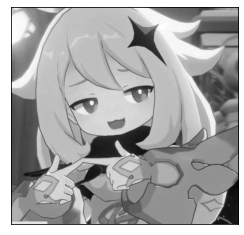

In [36]:
img = cv2.imread('data/paimeng.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

height = img.shape[0]
width = img.shape[1]

plt.figure()
plt.imshow(gray, "gray")
plt.xticks([]), plt.yticks([])
plt.show()

## 图像平移

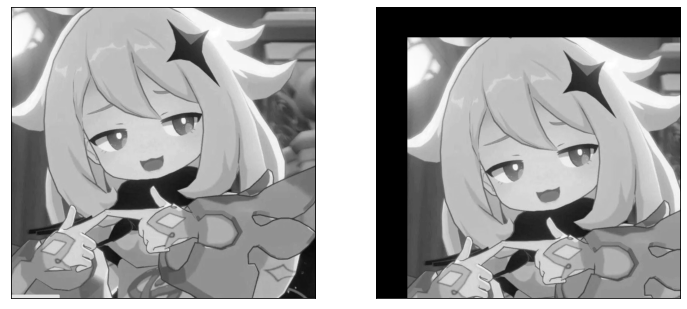

In [44]:
result = np.zeros((height, width), np.uint8)

x = 90
y = 90
for i in range(height):
    for j in range(width):
        if i>=x and j>=y:
            result[i, j] = gray[i-x][j-y]
        else:
            result[i,j] = 0

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(gray, "gray")
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(result, "gray")
plt.xticks([]), plt.yticks([])
plt.show()

## 图像镜像
### 垂直镜像

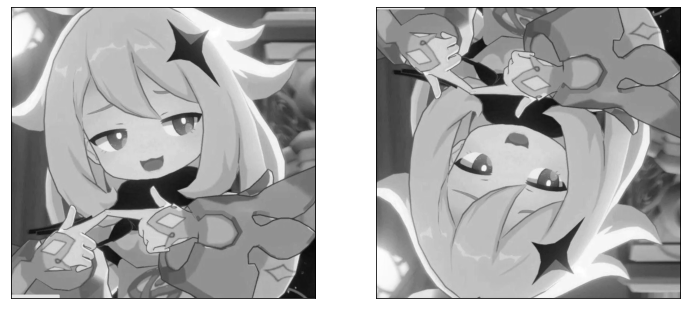

In [45]:
result = np.zeros((height, width), np.uint8)

for i in range(height):
    for j in range(width):
        result[i, j] = gray[height-i-1][j]
        
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(gray, "gray")
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(result, "gray")
plt.xticks([]), plt.yticks([])
plt.show()

### 水平镜像

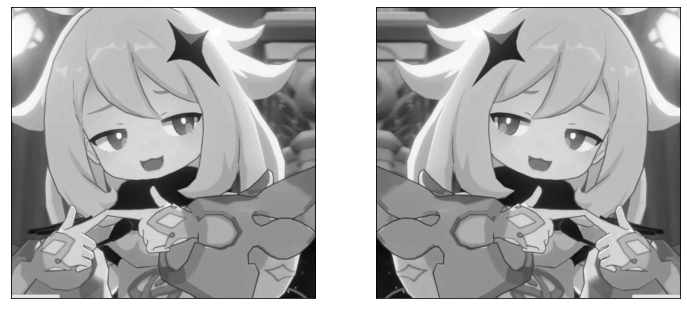

In [46]:
result = np.zeros((height, width), np.uint8)

for i in range(height):
    for j in range(width):
        result[i, j] = gray[i][width-j-1]
        
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(gray, "gray")
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(result, "gray")
plt.xticks([]), plt.yticks([])
plt.show()

## 图像旋转

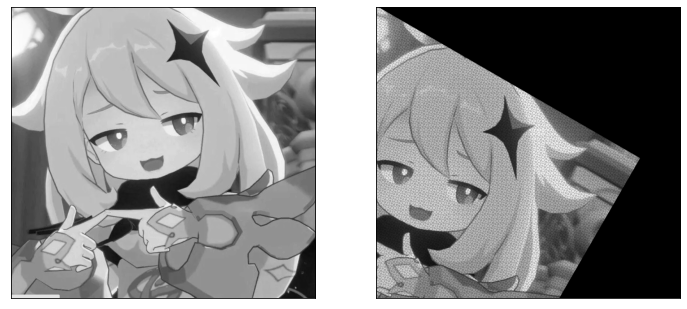

In [47]:
angle = 30
anglePi = angle * math.pi / 180.0
cosA = math.cos(anglePi)
sinA = math.sin(anglePi)
result = np.zeros((height, width), np.uint8)

for i in range(height):
    for j in range(width):
        x = cosA * i + sinA * j
        y = cosA * j - sinA * i
        x = int(x)
        y = int(y)
        if x > -1 and x < height and y > -1 and y < width :
            result[x, y] = gray[i, j]
            
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(gray, "gray")
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(result, "gray")
plt.xticks([]), plt.yticks([])
plt.show()

## 组合变换

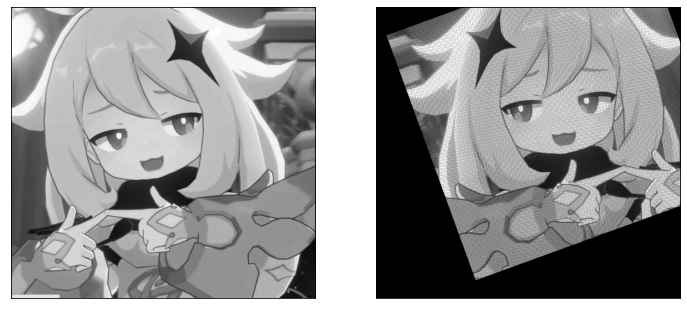

In [52]:
result = np.zeros((height, width), np.uint8)

x = 90
y = 90
for i in range(height):
    for j in range(width):
        if i>=x and j>=y:
            result[i, j] = gray[i-x][j-y]
        else:
            result[i,j] = 0

result1 = np.zeros((height, width), np.uint8)
for i in range(height):
    for j in range(width):
        result1[i, j] = result[i][width-j-1]

angle = -20
anglePi = angle * math.pi / 180.0
cosA = math.cos(anglePi)
sinA = math.sin(anglePi)
result2 = np.zeros((height, width), np.uint8)

for i in range(height):
    for j in range(width):
        x = cosA * i + sinA * j
        y = cosA * j - sinA * i
        x = int(x)
        y = int(y)
        if x > -1 and x < height and y > -1 and y < width :
            result2[x, y] = result1[i, j]

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(gray, "gray")
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(result2, "gray")
plt.xticks([]), plt.yticks([])
plt.show()

## 使用opencv

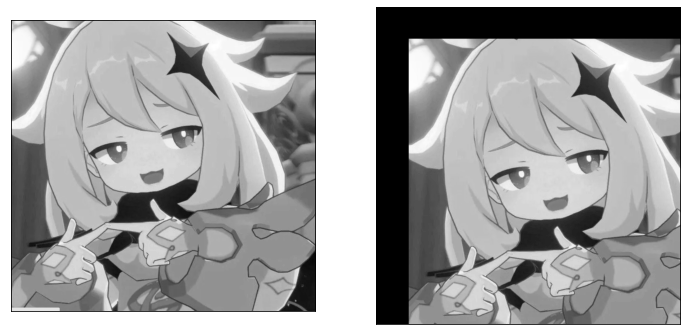

In [77]:
# 平移
M = np.float32([[1,0,90],[0,1,90]])
result = cv2.warpAffine(gray, M, (height, width))
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(gray, "gray")
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(result, "gray")
plt.xticks([]), plt.yticks([])
plt.show()

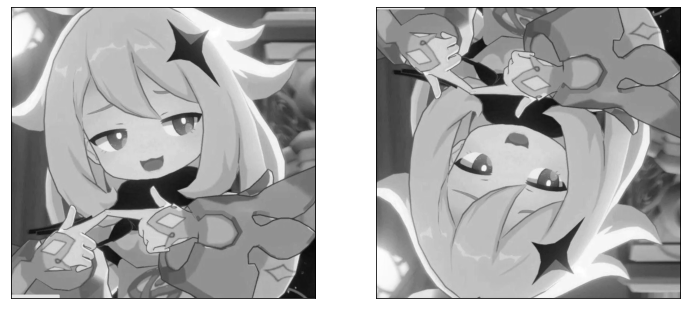

In [64]:
# 垂直翻转
result = cv2.flip(gray, 0)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(gray, "gray")
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(result, "gray")
plt.xticks([]), plt.yticks([])
plt.show()

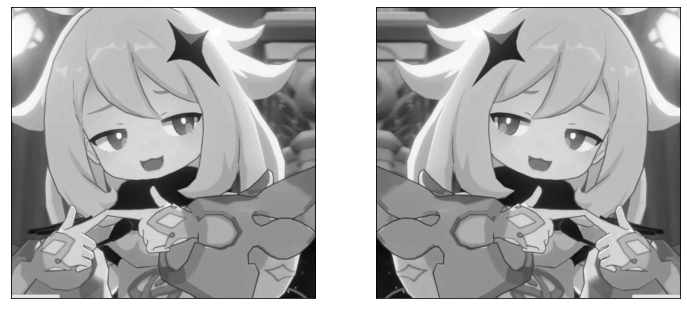

In [61]:
# 水平翻转
result = cv2.flip(gray, 1)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(gray, "gray")
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(result, "gray")
plt.xticks([]), plt.yticks([])
plt.show()

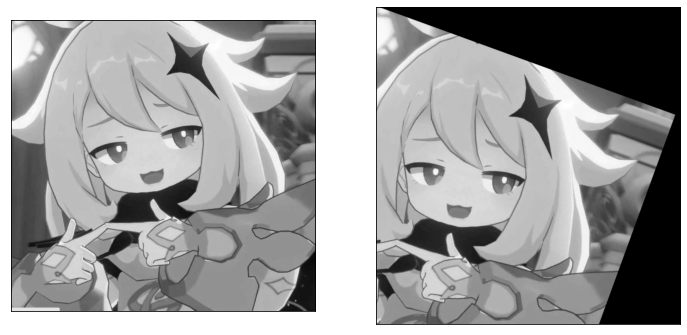

In [78]:
# 旋转
anglePi = angle * math.pi / 180.0
cosA = math.cos(anglePi)
sinA = math.sin(anglePi)
M = np.float32([[cosA,sinA,0],[-sinA,cosA,0]])
result = cv2.warpAffine(gray, M, (height, width))
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(gray, "gray")
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(result, "gray")
plt.xticks([]), plt.yticks([])
plt.show()